In [1]:
import numpy as np
import csv
import pandas as pd
import time 
import fluidlab as fl

In [2]:
#(r"D:\Ammonia_NBL_3D\NBL_3D_T_F100_600_Hot_Buoyant.csv",skiprows = sk,nrows = n, dtype =np.float32,header = None)
#(r"D:\Helium_FLUX_1\He_h01_01_T.csv",skiprows = sk,nrows = n, dtype =np.float32)

In [3]:
Start = 0 # numer of rows in dataset
End = 300 # time start

sk = Start*45*45*700
nr = End - Start
n = 45*45*700*nr
name = 'Helium_FLUX_1'
# #INPUT the path of the file
dft = pd.read_csv(r"D:\Helium_FLUX_1\He_h01_01_T.csv",skiprows = sk,nrows = n, dtype =np.float32)
datat = dft.to_numpy()
del dft
dfu = pd.read_csv(r"D:\Helium_FLUX_1\He_h01_01_U.csv",skiprows = sk,nrows = n, dtype =np.float32)
datau = dfu.to_numpy()
del dfu
dfv = pd.read_csv(r"D:\Helium_FLUX_1\He_h01_01_V.csv",skiprows = sk,nrows = n, dtype =np.float32)
datav = dfv.to_numpy()
del dfv
dfw = pd.read_csv(r"D:\Helium_FLUX_1\He_h01_01_W.csv",skiprows = sk,nrows = n, dtype =np.float32)
dataw = dfw.to_numpy()
del dfw
#'/Volumes/ThanhPor/Helium_FLUX_1/He_h01_01_W.csv'

In [4]:
#Shaping data into actural shape (45*45*700)
datat = np.reshape(datat, (45,45,700,nr), order="F")
datau = np.reshape(datau, (45,45,700,nr), order="F")
datav = np.reshape(datav, (45,45,700,nr), order="F")
dataw = np.reshape(dataw, (45,45,700,nr), order="F")

In [5]:
#Calculate Lambda2 
#Estimated time: 2h-3h
#Input (u,v,w,dx,dy,dz)
tic = time.perf_counter()
lamb2 = fl.lambda2t(datau,datav,dataw,dx=40,dy=40,dz=10)
toc1 = time.perf_counter()
print(f"Time: {((toc1 - tic)/60):0.4f} minutes")

Time: 76.0693 minutes


In [4]:
#delete in case running out of memeory
# del lamb2

In [6]:
name = 'Helium'
typedata = 'lambda2'

In [4]:
# #Calculate Omega 
# #Estimated time: 8 minutes
# #Input (u,v,w,dx,dy,dz)
# tic = time.perf_counter()
# ome = fl.omega(datau,datav,dataw,dx=40,dy=40,dz=10)
# toc1 = time.perf_counter()
# print(f"Time: {((toc1 - tic)/60):0.4f} minutes")
# #468

Time: 6.2411 minutes


In [7]:
tic = time.perf_counter()
#Saving File

filename = name +typedata+'.csv'
filedata = lamb2

import csv
nx,ny,nz,nt = filedata.shape[0],filedata.shape[1],filedata.shape[2],filedata.shape[3]
filedata = np.reshape(filedata, (nx*ny*nz*nt,1), order="F")
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile) 
    # writing the data rows   
    csvwriter.writerows(filedata)
    
toc1 = time.perf_counter()
print(f"Time: {((toc1 - tic)/60):0.4f} minutes")

Time: 13.8244 minutes


In [6]:
#delete in case running out of memeory
# del ome

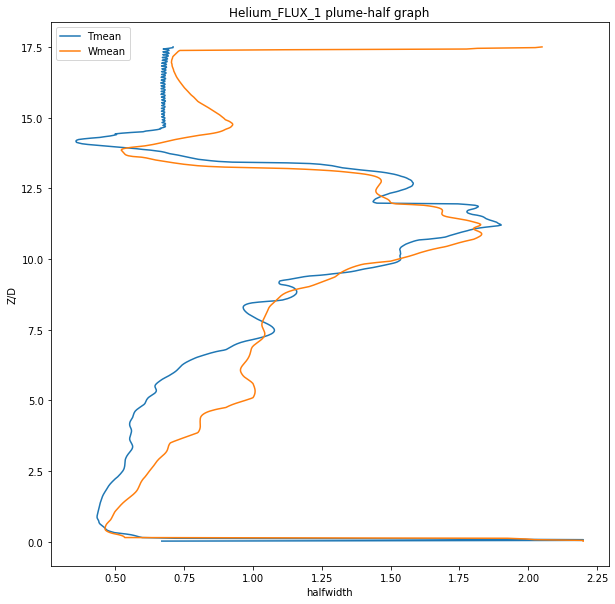

Eigen: 3.1327 seconds


In [5]:
# #Plumehalf graph
# #Estimated time: ~1 minutes
# #Input (u,v,w,threshold,dx,dy,dz,D,graphname)
# tic = time.perf_counter()
# threshold = 1/np.exp(1)
# fl.plumehalfgraph(dataw,datat,threshold,40,40,10,400,name)

# toc1 = time.perf_counter()
# print(f"Eigen: {toc1 - tic:0.4f} seconds") 

MovieWriter matplotlib.animation.PillowWritter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Eigen: 15.6471 seconds


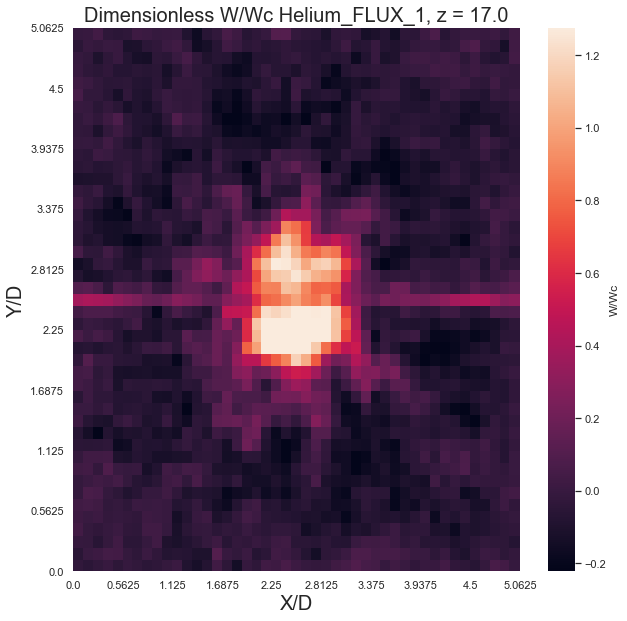

In [6]:
# #Top_view_graph
# #Estimated time: ~1 minutes
# #Input (data(w or t),type_data,file_namedx,dx,dy,dz,D,frame) * more frame will take longer
# tic = time.perf_counter()
# fl.topviewmap(dataw,datatype = "W/Wc",filename = name,dx=45,dy=45,dz=10,D=400,frame=20)
# toc1 = time.perf_counter()
# print(f"Eigen: {toc1 - tic:0.4f} seconds") 


In [8]:
# #Converting Cartesian to Polar
# #Estimated time: 1 mins
# #Input (u,v,w,dx,dy,dz)
# tic = time.perf_counter()
# Ur,Utheta,Uw = fl.cart2pol(datau,datav,dataw,dx=40,dy=40,dz=10)
# toc1 = time.perf_counter()
# print(f"Time: {toc1 - tic:0.4f} seconds")

Time: 54.5153 seconds


In [10]:
# del Ur,Utheta,Uw